###Challenge 1

In [282]:
import datetime
import dateutil.parser

def turnstile_dictt(filename="turnstile_150404.txt"):
    import csv
    turnstile_dict = {}
    with open(filename, "r") as creepy_data:
        reader = csv.reader(creepy_data)
        reader.next()
        for item in reader:
            key = tuple([i for index, i in enumerate(item) if index < 4])
            value = [i for index, i in enumerate(item) if index > 3]
            if key in turnstile_dict:
                turnstile_dict[key] += [value]
            else:
                turnstile_dict[key] = [value]
    return turnstile_dict

###Challenge 2

In [326]:
def time_dictt(filename="turnstile_150404.txt"):
    time_dict = {}
    for key, value in turnstile_dictt(filename).items():
        for item in value:
            new_value = [dateutil.parser.parse(item[2] + " " + item[3]), int(item[5])]
            if key in time_dict:        
                time_dict[key] += [new_value]
            else:
                time_dict[key] = [new_value]
    return time_dict
#print time_dictt(filename="sample_data.txt") 

###Challenge 3

In [428]:
import pdb
import operator
def total_dictt(filename="turnstile_150404.txt"):
    new_dict = {}
    for key,value in time_dictt(filename).iteritems():
        tempdict = {}
        for old_list in value:
            date = old_list[0].date()
            count = old_list[1]
            if date in tempdict:
                tempdict[date].append(count)
            else:
                tempdict[date] = [count]
        new_dict[key] = tempdict
    
    total_dict = {}
    for key, value in new_dict.iteritems():
        temp_list = []
        for date, count_list in value.iteritems():
            new_count = 0
            if count_list[0] < count_list[-1]:
                # no reset
                new_count = count_list[-1] - count_list[0]
            elif count_list[0] == count_list[-1]:
                # only one count in list
                new_count = count_list[0]
            else:
                # reset
                reset_index = 0
                for index, count in enumerate(count_list):
                    if count < count_list[index-1]: reset_index = index
                before_reset = count_list[0] if reset_index == 1 else count_list[reset_index-1] - count_list[0]
                after_reset = count_list[-1] if reset_index == len(count_list) else count_list[-1] - count_list[reset_index]
                new_count = before_reset + after_reset
            temp_list.append([date, new_count])
        total_dict[key] = temp_list
    return total_dict

total_dictt(filename="sample.txt")
# error at 01-05-01', '5 AVE'

{('A002',
  'R051',
  '02-00-00',
  'LEXINGTON AVE'): [[datetime.date(2015, 3, 28),
   915], [datetime.date(2015, 4, 2), 1597], [datetime.date(2015, 4, 3),
   1268], [datetime.date(2015, 4, 1), 1564], [datetime.date(2015, 3, 31),
   1455], [datetime.date(2015, 3, 30), 1560], [datetime.date(2015, 3, 29),
   681]],
 ('A002',
  'R051',
  '02-00-01',
  'LEXINGTON AVE'): [[datetime.date(2015, 3, 28),
   761], [datetime.date(2015, 4, 2), 1321], [datetime.date(2015, 4, 3),
   836], [datetime.date(2015, 4, 1), 1357], [datetime.date(2015, 3, 31),
   1284], [datetime.date(2015, 3, 30), 1238], [datetime.date(2015, 3, 29),
   647]],
 ('A002',
  'R051',
  '02-03-00',
  'LEXINGTON AVE'): [[datetime.date(2015, 3, 28),
   373], [datetime.date(2015, 4, 2), 520], [datetime.date(2015, 4, 3),
   450], [datetime.date(2015, 4, 1), 543], [datetime.date(2015, 3, 31),
   578], [datetime.date(2015, 3, 30), 530], [datetime.date(2015, 3, 29), 227]],
 ('A002',
  'R051',
  '02-03-01',
  'LEXINGTON AVE'): [[datetime

In [426]:
# temp = total_dictt()
# print temp.items()[0]

In [425]:
# all_counts = [count for rows in temp.values() for time, count in rows]
# all_counts.sort()
# print all_counts[:3000]

###Challenge 4

turnstile: ('R604', 'R108', '03-00-02', 'BOROUGH HALL/CT')


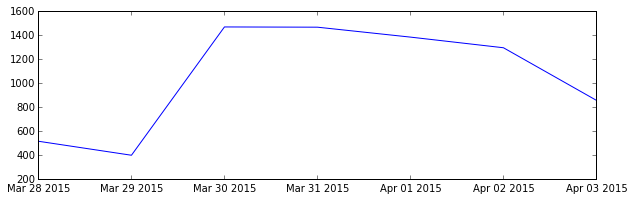

In [429]:
import random
import operator
total_dict = total_dictt()
turnstile = random.choice(total_dict.keys())
print("turnstile: " + str(turnstile))
%matplotlib inline
import matplotlib.pyplot as plt
total_dict[turnstile].sort(key=lambda x: x[0])
dates, counts = [list(t) for t in zip(*total_dict[turnstile])]
plt.figure(figsize=(10,3))
plt.plot(dates,counts)

###Challenge 5

In [430]:
def combo_dictt(filename="turnstile_150404.txt"):
    combo_dict = {}
    for key,value in total_dictt(filename).items():
        new_keys = (key[0],key[1],key[3])
        if new_keys in combo_dict:
            holder = {}
            for k,v in combo_dict[new_keys] + value:
                holder[k] = holder.get(k, 0) + v
            combo_dict[new_keys] = [(i[0],holder[i[0]]) for i in value]
        else:
            combo_dict[new_keys] = value
    return combo_dict

###Challenge 6

In [431]:
def station_dictt(filename="turnstile_150404.txt"):
    station_dict = {}
    for key,value in total_dictt(filename).items():
        new_key = key[3]
        if new_key in station_dict:
            holder = {}
            for k,v in station_dict[new_key] + value:
                holder[k] = holder.get(k, 0) + v
            station_dict[new_key] = [(i[0],holder[i[0]]) for i in value]
        else:
            station_dict[new_key] = value
    return station_dict

###Challenge 7

station: JOURNAL SQUARE


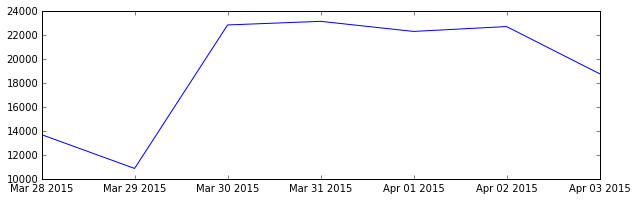

In [432]:
import random
station_dict = station_dictt()
station = random.choice(station_dict.keys())
#station = "JOURNAL SQUARE"
print("station: " + station)
station_dict[station].sort(key=lambda x: x[0])
dates, counts = [list(t) for t in zip(*station_dict[station])]
plt.figure(figsize=(10,3))
plt.plot(dates,counts)

###Challenge 8

station: NEWKIRK PLAZA


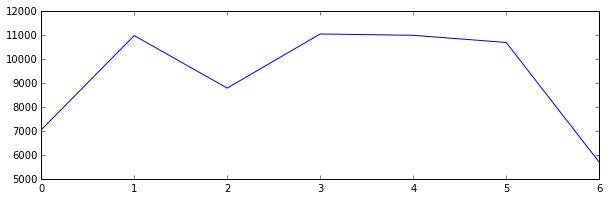

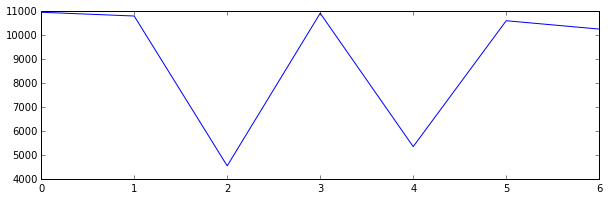

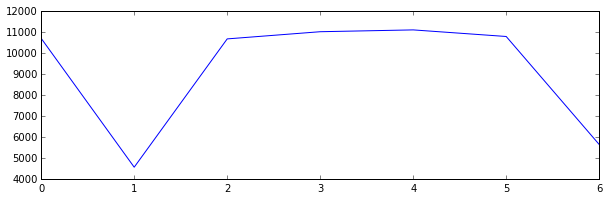

In [434]:
import random
station_dict = station_dictt()
turnstile = random.choice(station_dict.keys())
print("station: " + turnstile)
station_dict[station].sort(key=lambda x: x[0])
week_count_list = [i[1] for i in station_dict[turnstile]]
plt.figure(figsize=(10,3))
plt.plot(week_count_list)

station_dict = station_dictt("turnstile_150321.txt")
station_dict[station].sort(key=lambda x: x[0])
week_count_list2 = [i[1] for i in station_dict[turnstile]]
plt.figure(figsize=(10,3))
plt.plot(week_count_list2)

station_dict = station_dictt("turnstile_150314.txt")
station_dict[station].sort(key=lambda x: x[0])
week_count_list3 = [i[1] for i in station_dict[turnstile]]
plt.figure(figsize=(10,3))
plt.plot(week_count_list3)

###Challenge 9

In [438]:
import random
station_dict = station_dictt()
total_riders_1 = {key: sum([i[1] for i in value]) for key, value in station_dict.iteritems()}
sorted_1 = sorted(total_riders_1.items(), key=operator.itemgetter(1))
sorted_1

# station_dict = station_dictt("turnstile_150321.txt")
# total_riders_2 = {key: sum([i[1] for i in value]) for key, value in station_dict.iteritems()}

# station_dict = station_dictt("turnstile_150314.txt")
# total_riders_3 = {key: sum([i[1] for i in value]) for key, value in station_dict.iteritems()}


[('BROAD CHANNEL', 1740),
 ('PATH WTC 2', 2965),
 ('BEACH 44 ST', 3976),
 ('E 143 ST', 5324),
 ('AQUEDUCT-N CNDT', 6679),
 ('CYPRESS HILLS', 8644),
 ('22 AVE-BAY PKY', 8779),
 ('VAN ALSTON-21ST', 9473),
 ('TOMPKINSVILLE', 9919),
 ('BOTANIC GARDEN', 10053),
 ('NEPTUNE AVE', 10060),
 ('ATLANTIC AVE', 10372),
 ('AQUEDUCT TRACK', 10857),
 ('BEACH 25 ST', 10872),
 ('55 ST', 11034),
 ('104 ST', 11124),
 ('BEACH 105 ST', 11318),
 ('BUSHWICK AVE', 11432),
 ('JFK HOWARD BCH', 12153),
 ('215 ST', 13001),
 ('AVE I', 13411),
 ('JUNIUS ST', 13840),
 ('BEACH 67 ST', 13881),
 ('121 ST', 13915),
 ('BOWERY', 14255),
 ('ALABAMA AVE', 14568),
 ('SENECA AVE', 15058),
 ('BEVERLEY ROAD', 15567),
 ('BOYD-88 ST', 15610),
 ('LIBERTY AVE', 15712),
 ('AVE P', 16516),
 ('BRONX PARK EAST', 16626),
 ('AVE X', 16652),
 ('W 8 ST-AQUARIUM', 16724),
 ('BAY 50 ST', 16817),
 ('74 ST-BROADWAY', 17567),
 ('AVE H', 18221),
 ('CHAUNCEY ST', 18251),
 ('138 ST-GR CONC', 18702),
 ('SHEPHERD AVE', 19438),
 ('BEEBE-39 AVE', 20022

###Challenge 10

(array([ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  2.]),
 array([  2.48516206e+08,   2.49604190e+08,   2.50692174e+08,
          2.51780158e+08,   2.52868142e+08,   2.53956126e+08,
          2.55044110e+08,   2.56132094e+08,   2.57220078e+08,
          2.58308062e+08,   2.59396046e+08]),
 <a list of 10 Patch objects>)

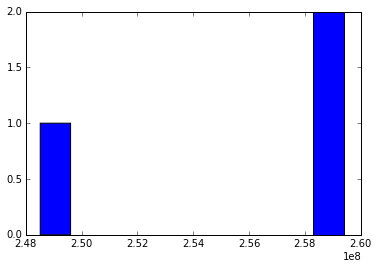

In [202]:
total_ridership_counts = [total_]
plt.hist(total_ridership_counts)